# <center> Aplicación en Bioestadística: Análisis de Depresión en RR.SS.
## <center>AI Saturdays Euskadi Donostia 2020

In [1]:
import pandas as pd
from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('../raw-data/OSF_socialmedia_data.csv', index_col=0)
df.head()

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,AutoPSMU,News,Active
1,115091,05/02/2017,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,61.0,64.0,68.0,50.0,56.0,73.0,66.0,66,39.0,38.0
2,115091,05/02/2017,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,57.0,70.0,58.0,37.0,56.0,67.0,0.0,#skipped#,27.0,23.0
3,115091,05/02/2017,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,44.0,70.0,67.0,26.0,38.0,39.0,63.0,56,34.0,36.0
4,115091,05/02/2017,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,56.0,79.0,89.0,30.0,20.0,60.0,67.0,68,29.0,23.0
5,115091,05/02/2017,Tuesday,18:00:00,Daily questions,5,1,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print("Number of participants: {}".format(df.Participant.nunique()))

Number of participants: 125


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12245 entries, 1 to 12245
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Participant                      12245 non-null  int64  
 1   Date                             12245 non-null  object 
 2   Day                              12245 non-null  object 
 3   Time                             12245 non-null  object 
 4   Session.Name                     12245 non-null  object 
 5   Notification.No                  12245 non-null  int64  
 6   LifePak.Download.No              12245 non-null  int64  
 7   Responded                        12245 non-null  int64  
 8   Completed.Session                12245 non-null  int64  
 9   Session.Instance                 8695 non-null   float64
 10  Session.Instance.Response.Lapse  8695 non-null   object 
 11  Reminders.Delivered              12245 non-null  int64  
 12  Instr_DQs         

## ¿Cómo se distribuyen las variables de respuesta?

In [5]:
#Select columns that belong to the depressive symptoms questionnaire

ESM_quest = df.iloc[:,13:-4]
ESM_quest.describe()

,Fatigue,DeprMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress
count,8653.000000,8648.000000,8646.000000,8645.000000,8646.000000,8646.000000,8650.000000,8649.000000
mean,36.990524,13.149861,11.971085,26.385772,25.501619,10.583854,12.021734,20.646896
std,29.717380,18.277533,16.962882,26.084848,26.272407,15.485521,16.732938,23.192832
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,6.000000,5.000000,19.000000,18.000000,3.000000,5.000000,14.000000
75%,64.000000,20.000000,18.000000,45.000000,40.000000,17.000000,19.000000,30.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


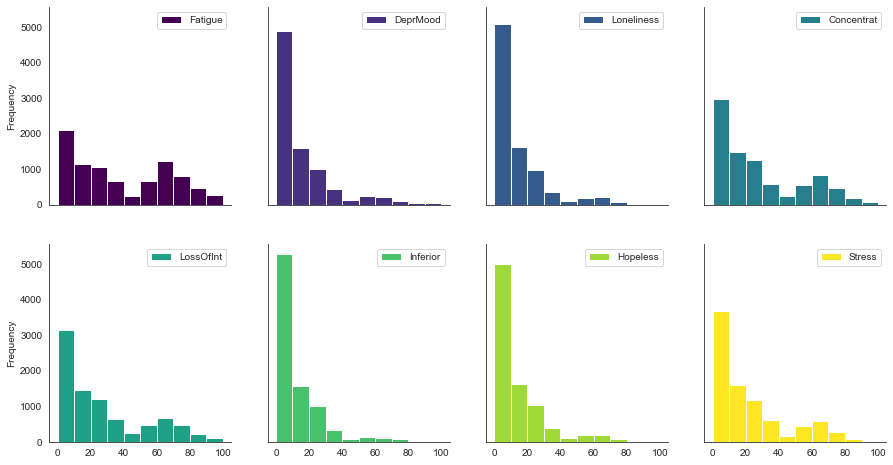

In [6]:
sns.set_style("white")
ESM_quest.plot.hist(subplots=True, layout=(2, 4), figsize=(15, 8), sharey=True,colormap='viridis')
sns.despine()

In [7]:
df['Date']= pd.to_datetime(df['Date'])
df.head()

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,AutoPSMU,News,Active
1,115091,2017-05-02,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,61.0,64.0,68.0,50.0,56.0,73.0,66.0,66,39.0,38.0
2,115091,2017-05-02,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,57.0,70.0,58.0,37.0,56.0,67.0,0.0,#skipped#,27.0,23.0
3,115091,2017-05-02,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,44.0,70.0,67.0,26.0,38.0,39.0,63.0,56,34.0,36.0
4,115091,2017-05-02,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,56.0,79.0,89.0,30.0,20.0,60.0,67.0,68,29.0,23.0
5,115091,2017-05-02,Tuesday,18:00:00,Daily questions,5,1,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ¿Cuándo participó cada sujeto?

Como comenté en la reunión del miércoles, una opción que podría ser interesante es ver si podemos agrupar los sujetos en función de cuándo empezaron y cuándo terminaron el experimento, de tal forma que para cada grupo sí tendríamos series temporales *correctas*.

In [8]:
# Create a new array with start and end dates for each participant

dates = pd.DataFrame([])

for participant in df.Participant.unique():
    dates = dates.append(pd.DataFrame({'start': df[df.Participant==participant].Date.min(), 'end': df[df.Participant==participant].Date.max()}, index=[0]), ignore_index=True)

dates.head()

,start,end
0,2017-05-02,2017-05-15
1,2017-05-11,2017-05-24
2,2017-04-06,2017-04-19
3,2017-04-07,2017-04-20
4,2017-04-12,2017-04-25


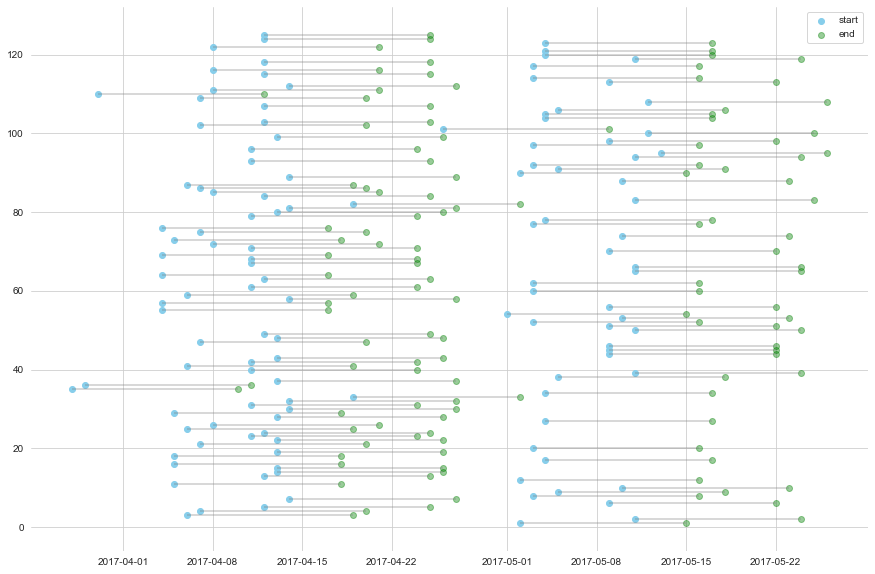

In [9]:
my_range=range(1,len(dates.index)+1)

sns.set_style("whitegrid")
fig = plt.figure(figsize=(15, 10))

plt.hlines(y=my_range, xmin=dates.start, xmax=dates.end, color='grey', alpha=0.4)
plt.scatter(dates.start, my_range, color='skyblue', alpha=1, label='start')
plt.scatter(dates.end, my_range, color='green', alpha=0.4 , label='end')
plt.legend()
sns.despine(left=True, bottom=True, trim=True)

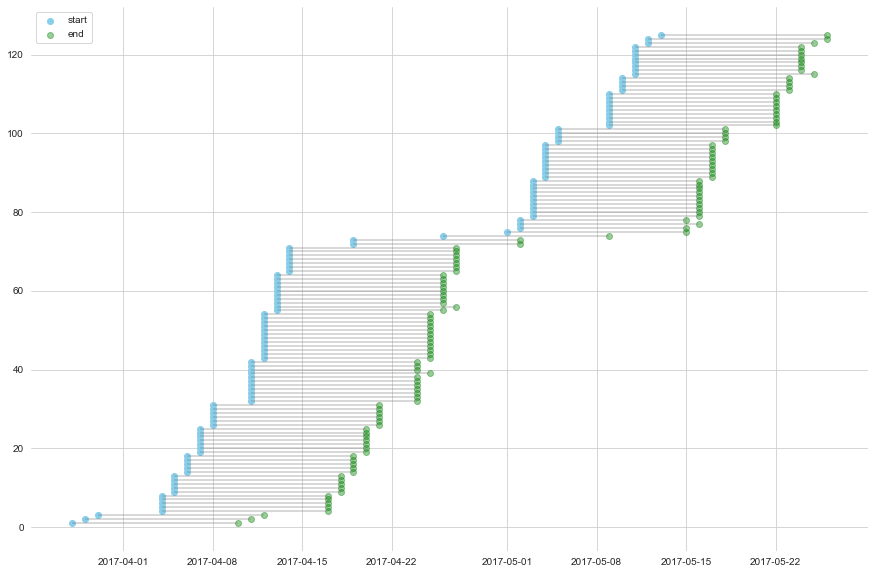

In [10]:
ordered_dates = dates.sort_values(by=['start'])

fig = plt.figure(figsize=(15, 10))

plt.hlines(y=my_range, xmin=ordered_dates.start, xmax=ordered_dates.end, color='grey', alpha=0.4)
plt.scatter(ordered_dates.start, my_range, color='skyblue', alpha=1, label='start')
plt.scatter(ordered_dates.end, my_range, color='green', alpha=0.4 , label='end')
plt.legend()
sns.despine(left=True, bottom=True, trim=True)